In [13]:
"""Importamos librerias"""

import numpy as np
import matplotlib.pyplot as plt
import random
"""Definimos una generacion de muchos numeros aleatorios entre 1 y 0 (Numeros)
.definimos una muestra tal que tome de manera aleatoria 20 numeros de los origniales, donde repito 
este proceso 10000 veces mas.
Finalmente genero una suma de estos 20 numeros de cada repeticion"""

numeros = np.array([random.uniform(0,1) for n in range(10000000)])

muestra = np.array([random.choices(numeros, k = 20) for n in range(10000)])

suma = muestra.sum(axis=1)

In [14]:
#defino una función la cual busca el número de elementos existentes en un cierto rango
def busqueda(a,b):
    valores = (a <= suma) & (suma <= b)
    valores1 = suma[valores]
    p = len(valores1)
    return p

In [15]:
#La probabilidad de que la suma de los 20 números esté entre 9 y 10
(busqueda(9,10)/10000)*100

27.32

In [16]:
#La probabilidad de que la suma de los 20 números esté entre 15 y 16
(busqueda(15,16)/10000)*100

0.0

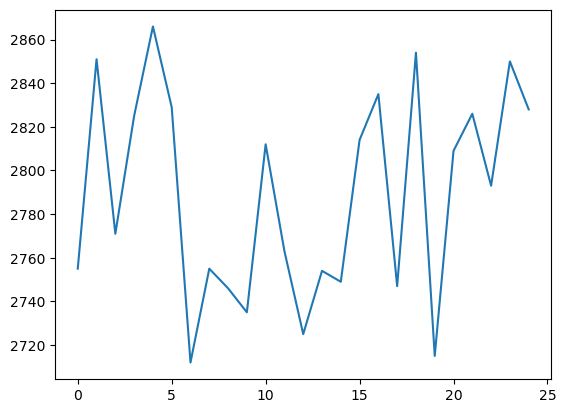

In [17]:
"""Repetimos varias veces la simulación para determinar la probabilidad de que la suma de los números esté entre 9 y 10.
y luego graficamos"""

sims = 25
probs = np.zeros(sims)

for i in range(sims):
    muestra = np.array([random.choices(numeros, k = 20) for n in range(10000)])
    suma = muestra.sum(axis=1)
    probs[i] = busqueda(9,10)

plt.plot(np.arange(sims), probs)
plt.show()

In [18]:
probs.mean()

2788.76

In [19]:
probs.std()

47.05594967695371

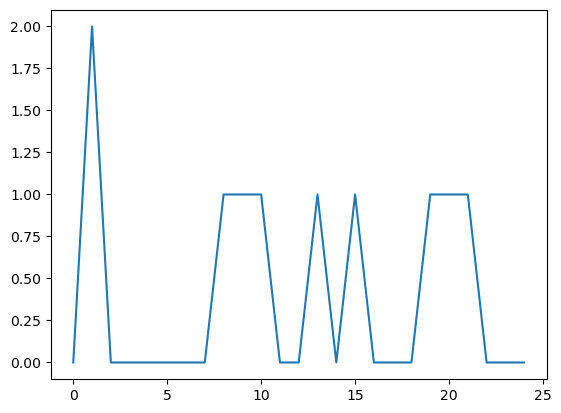

In [20]:
"""Mismo caso anterior pero ahora esté entre 15 y 16. y luego graficamos"""


sims = 25
probs = np.zeros(sims)

for i in range(sims):
    muestra = np.array([random.choices(numeros, k = 20) for n in range(10000)])
    suma = muestra.sum(axis=1)
    probs[i] = busqueda(15,16)

plt.plot(np.arange(sims), probs)
plt.show()

In [21]:
probs.mean()

0.4

In [22]:
probs.std()

0.5656854249492381

In [11]:
#media de cada muestra 
promedio = suma/20

In [36]:
#Defino la distribución gaussiana
def gauss(x, m, sigma):
    return np.exp(-(x - m)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

In [37]:
#Calculamos la media del conjunto que contiene 10000000 de números
m =((sum(numeros))/10000000)
print(m)

0.49988950384357284


In [38]:
"""Luego calculo la desviación estándar para el ajuste gaussiano de las medias , 
utilizando el teorema del límite central"""
sigma = np.sqrt(((np.std(numeros))**2)/20)
print(sigma)

0.0645574300960629


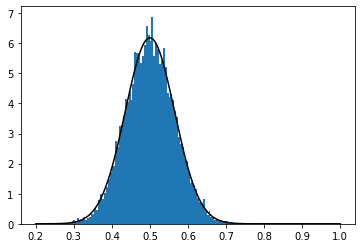

In [39]:
""""Graficamos las medias muestrales y la distribución gaussiana que se ajusta al conjunto 
de medias  según el teorema"""

x = np.linspace(0.2,1,10000)
plt.plot(x, (gauss(x, m, sigma)),"k")
plt.hist(promedio , density=True , bins=100)
plt.show()

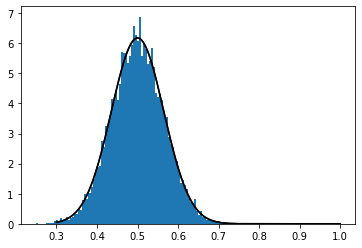

In [41]:
#Ahora ajuste una gaussiana usando la media y desviación estándar de los datos correspondientes a las medias muestrales
media=(sum(promedio)/10000)
d=np.std(promedio)
#Graficamos la nueva gaussiana para compararla con el ajuste anterior realizado con el teorema del límite central
x = np.linspace(1,0.3,10000)
plt.plot(x, (gauss(x, m, sigma)),"k")
plt.plot(x, (gauss(x, media, d)),"k")
plt.hist(promedio , density=True , bins=100)
plt.show()

# Calificación: 6.0

Faltó calcular laprobabilidad usando la aproximación con la Gaussiana. Esto sirve para darse cuenta de que el teorema central del límite no funciona en las colas. Es decir cuando la probabilidad es pequeña la gaussiana no es una buena aproximación.